# YOLOv8 - Object Detection
- https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/

---

## Install YOLOv8, Roboflow

In [ ]:
!nvidia-smi

Tue May 16 08:39:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 23.4/166.8 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

import os
import glob

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00


## Get dataset from Roboflow

In [ ]:
# No Augmentation
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mJ1HdvTFkBN91BXWXxpX")
project = rf.workspace("yolo8project").project("in-isp")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to IN-ISP-1 in yolov8:: 100%|██████████| 612/612 [00:00<00:00, 8252.63it/s]


## Train model

In [ ]:
# Input 'data.yaml' file path

In [ ]:
%%time

%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/IN-ISP-1/data.yaml' epochs=200 imgsz=512 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 68.0MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/IN-ISP-1/data.yaml, epochs=200, patience=50, batch=16, imgsz=512, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

In [ ]:
# # Download 'best.pt'
# from google.colab import files

# filename = '/content/runs/detect/train/weights/best.pt'
# files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Results

/content


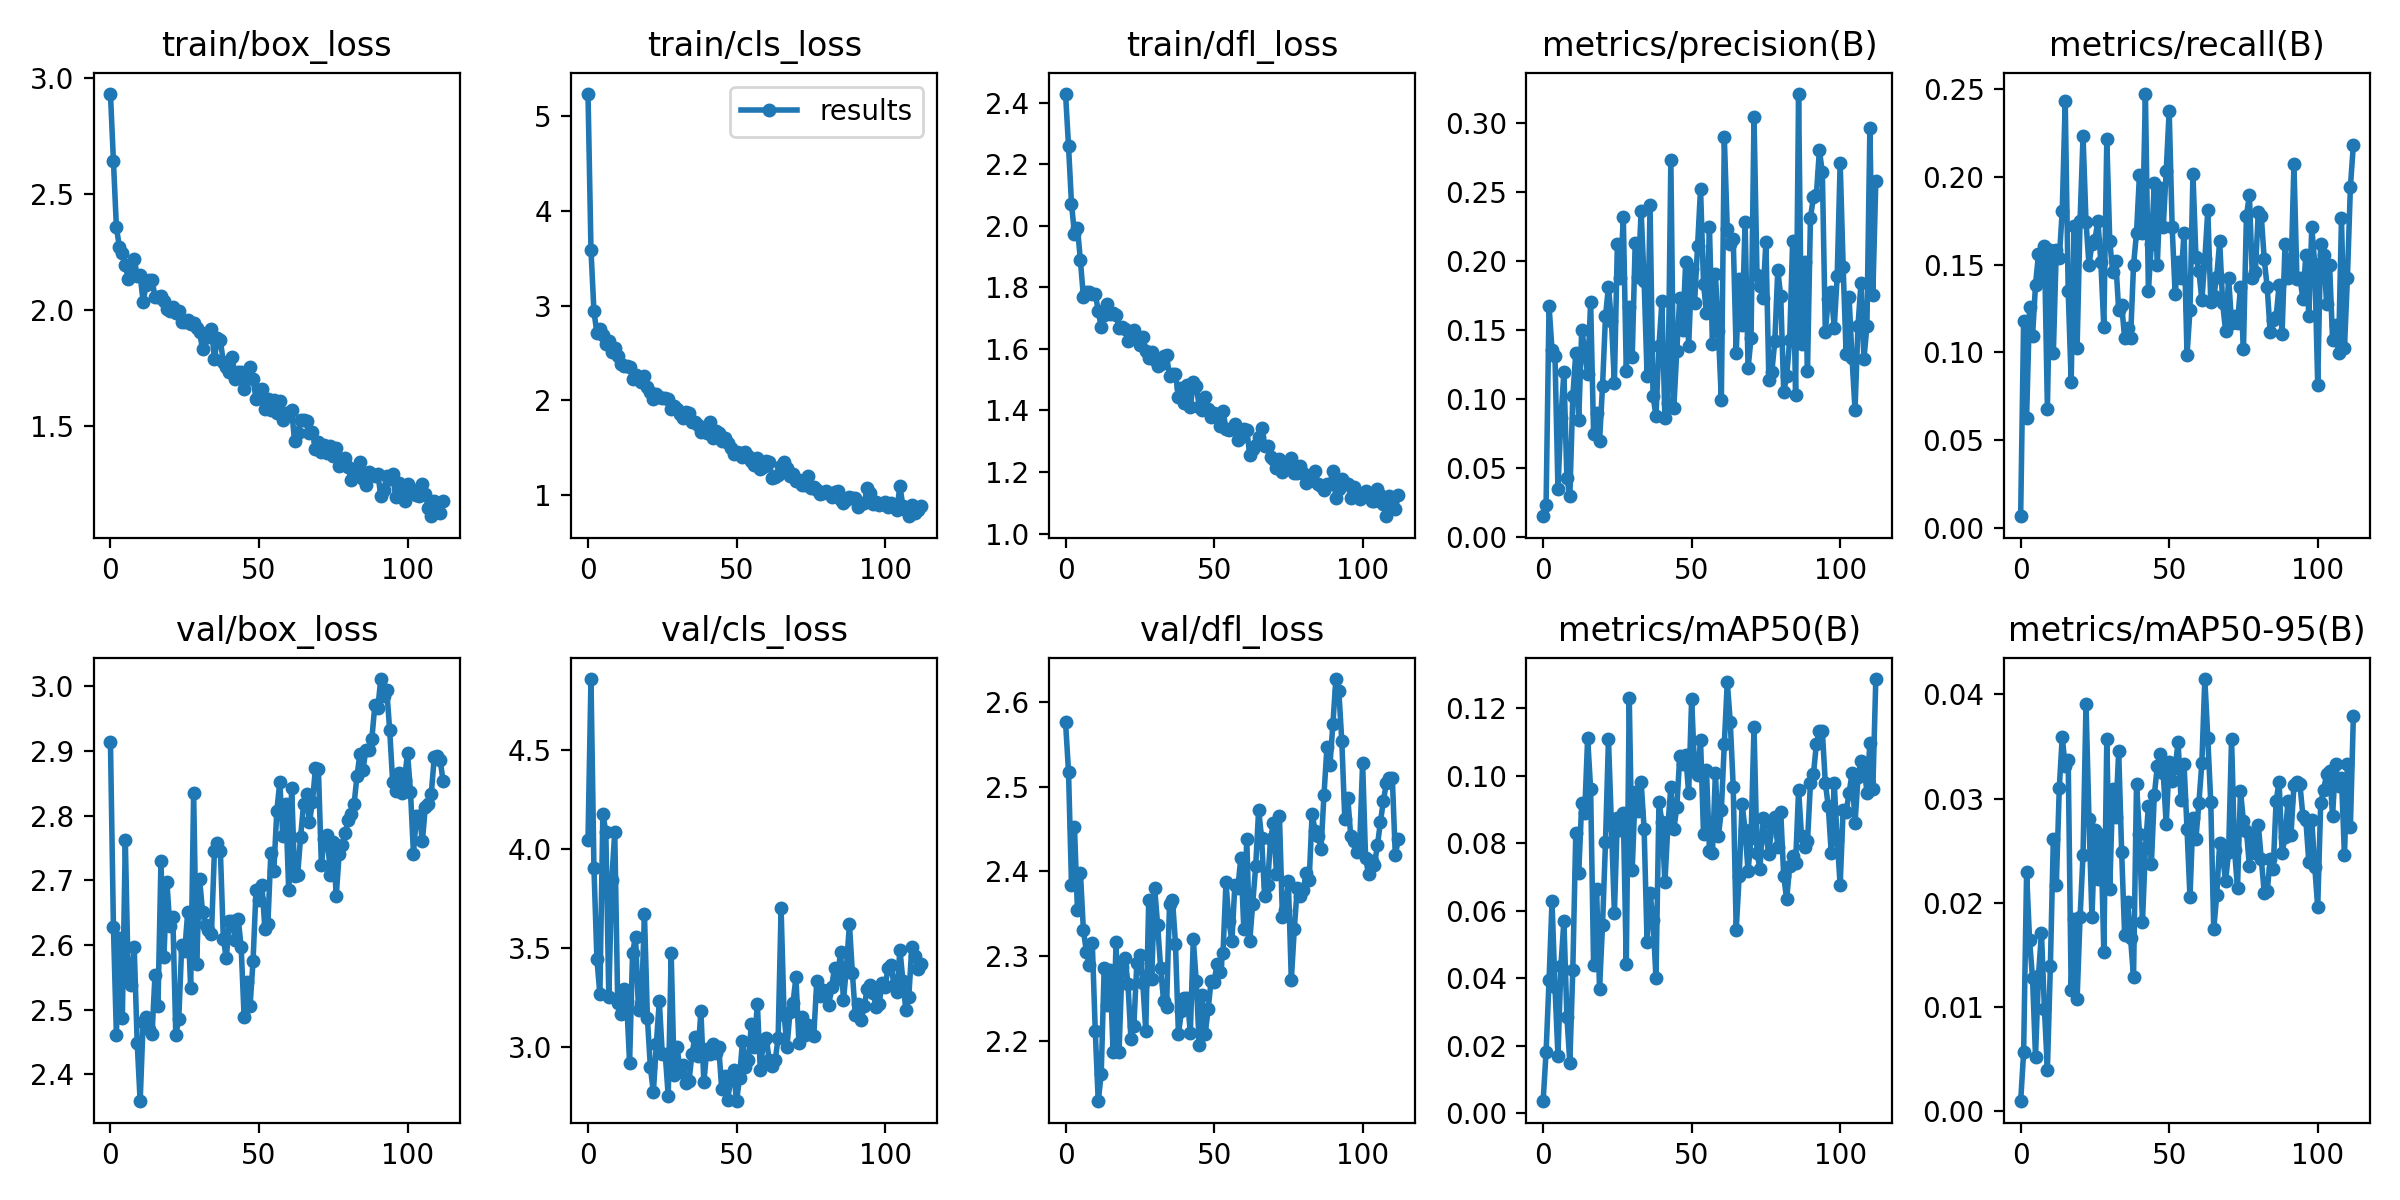

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


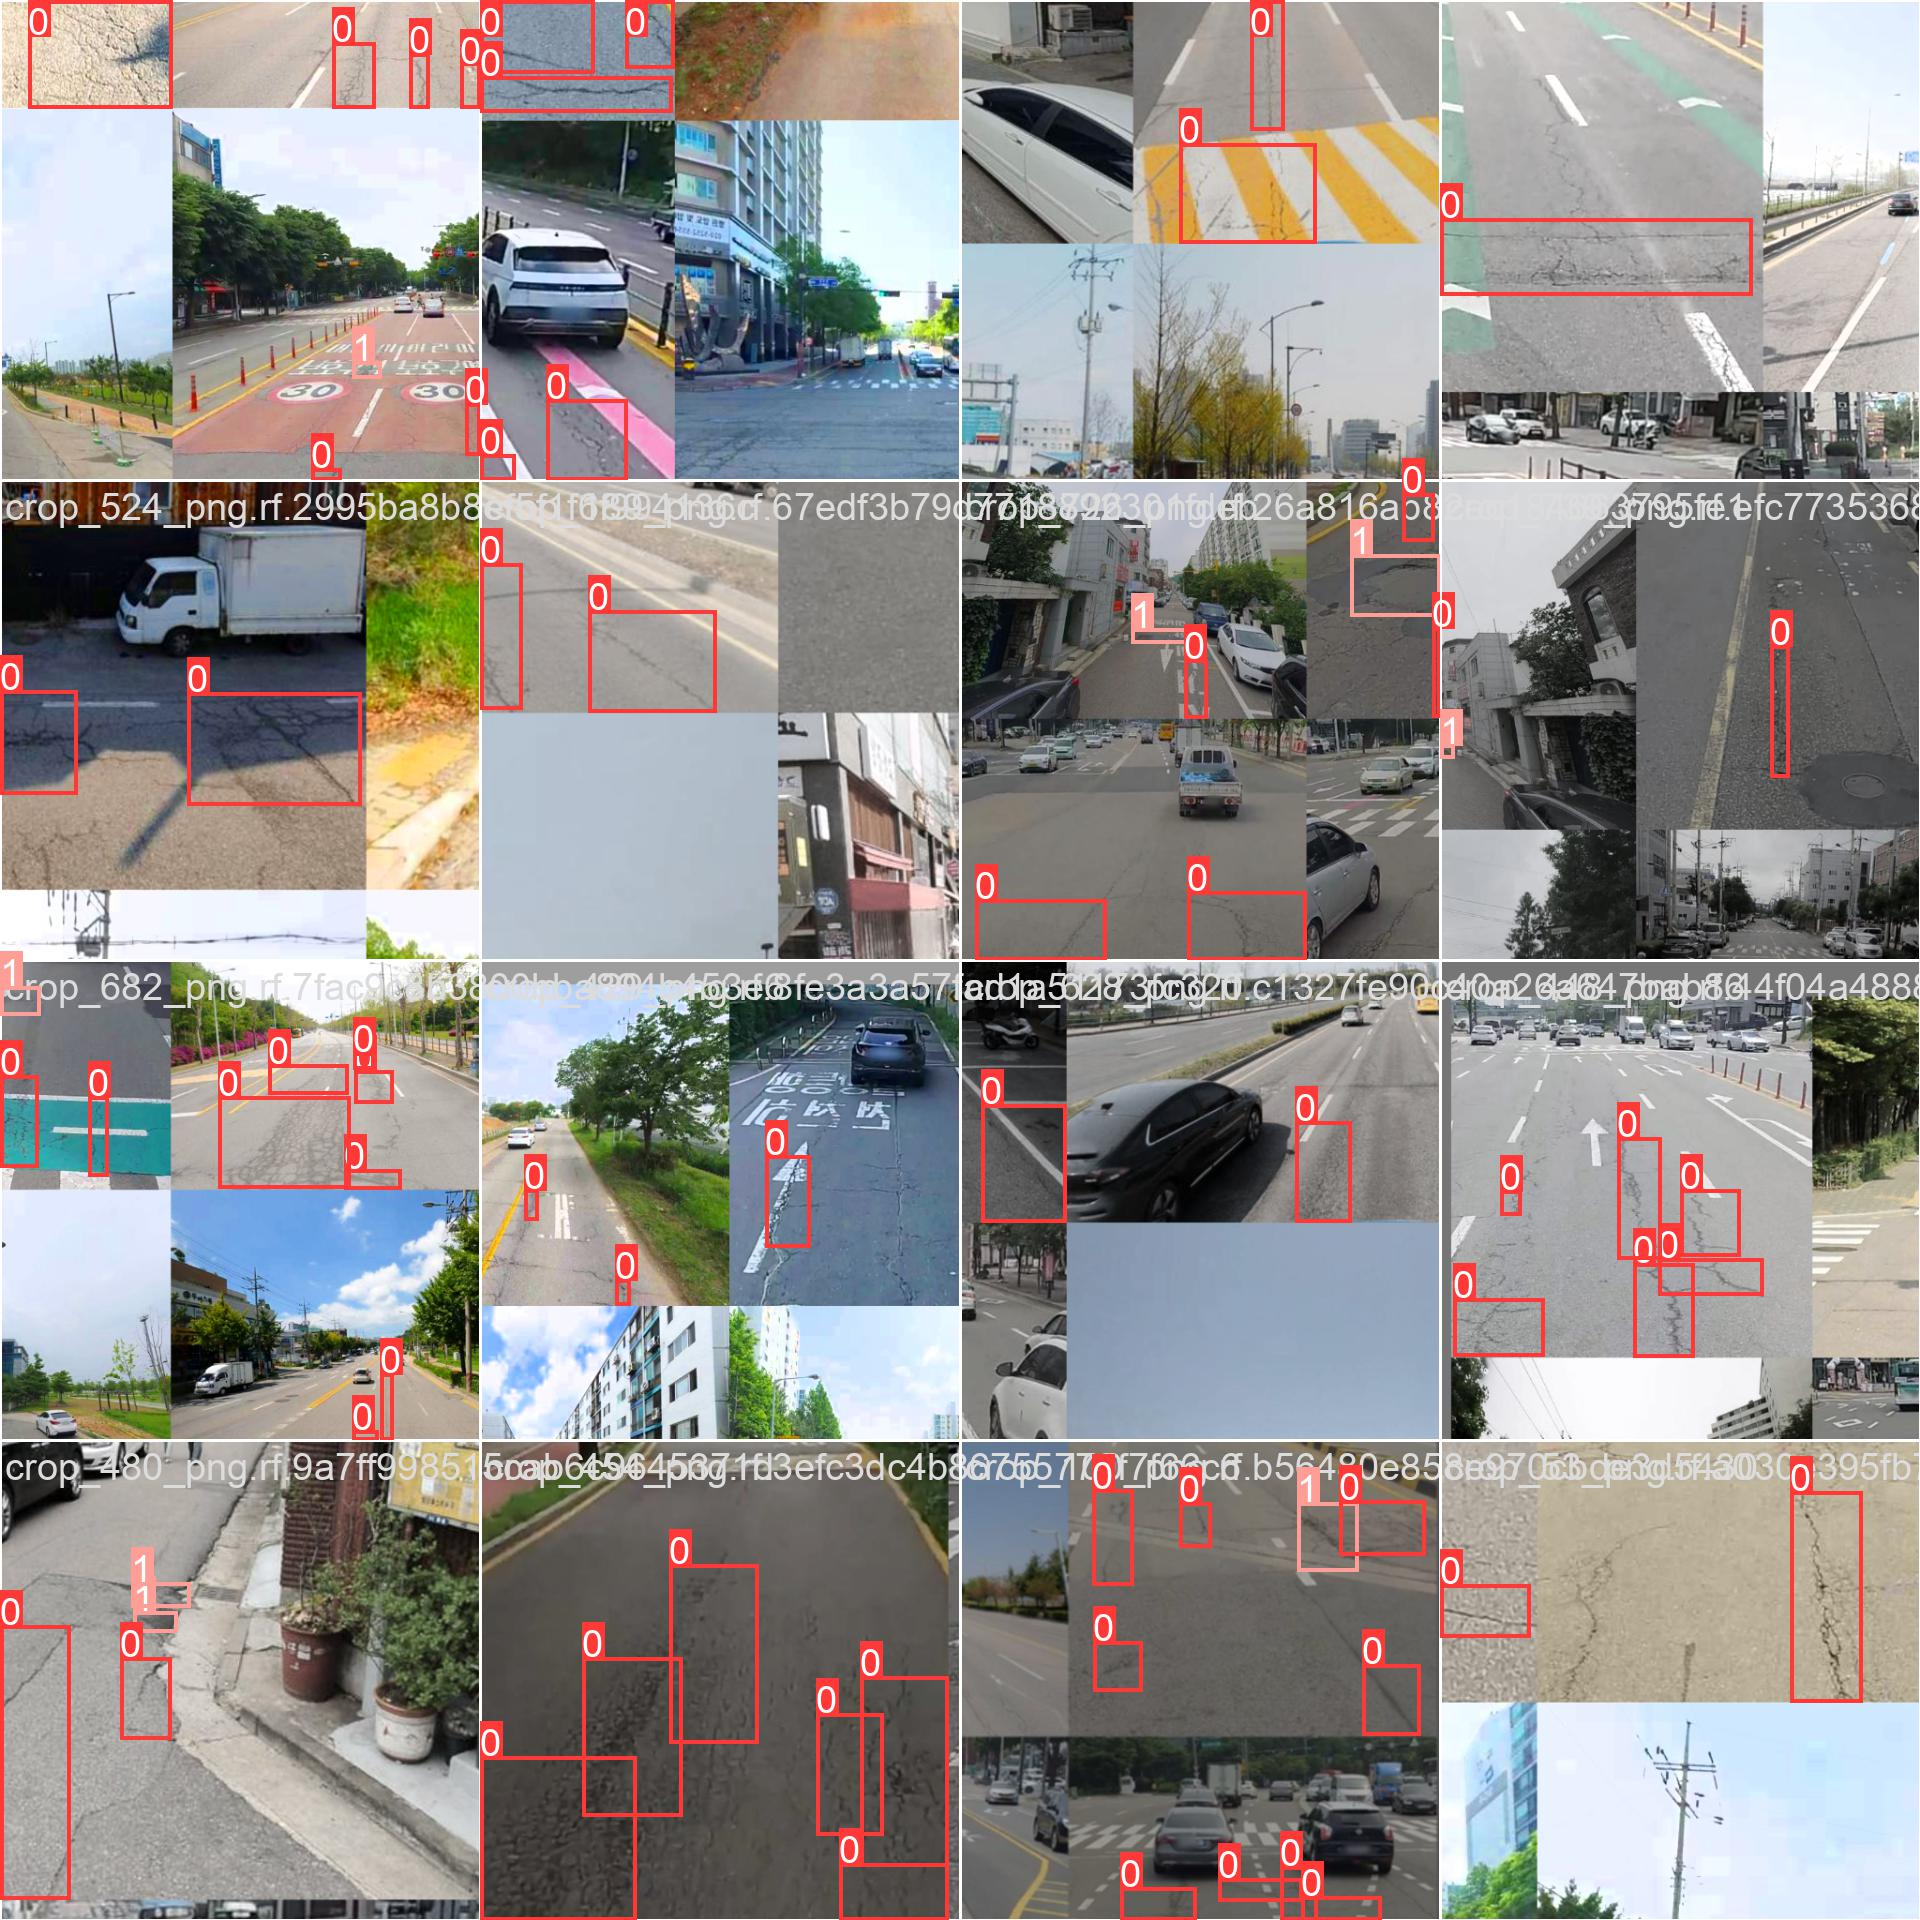

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=800)

## Predict

#### (1) Prediction - test data

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/datasets/IN-ISP-1/test/images' save=True

/content
2023-05-16 08:53:36.886718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 08:53:37.800922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/30 /content/datasets/IN-ISP-1/test/images/crop_101_png.rf.6c656fae21f144d55ee71dd74a045b2e.jpg: 512x512 1 crack, 11.2ms
image 2/30 /content/datasets/IN-ISP-1/test/images/crop_113_png.rf.ec1f21e164b941ef10e747af6ce917dc.jpg: 512x512 11.2ms
image 3/30 /content/datasets/IN-ISP-1/test/images/crop_156_png.rf.c7b4a622a989d2ceba27fb6e9a23b0b0.jpg: 512x512 1 crack, 11.2ms
imag

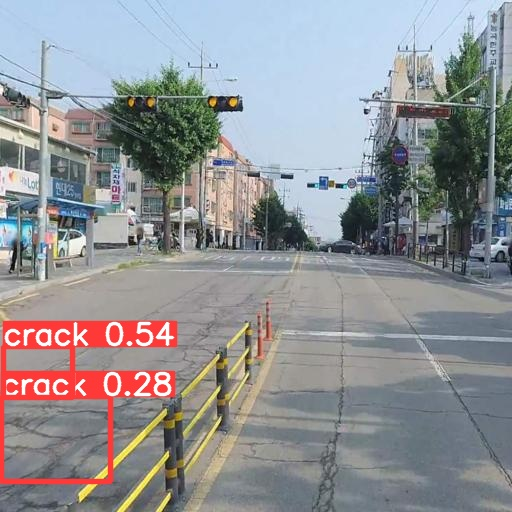

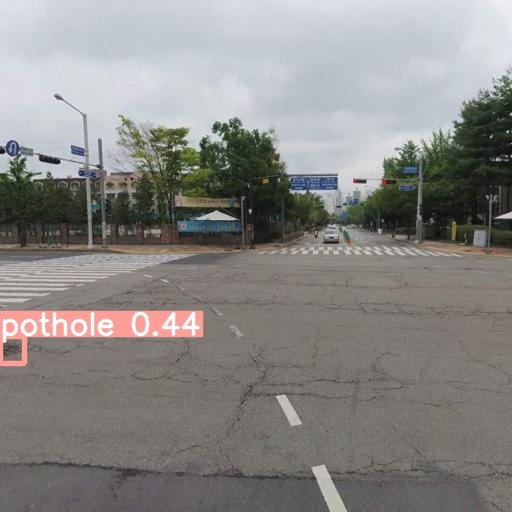

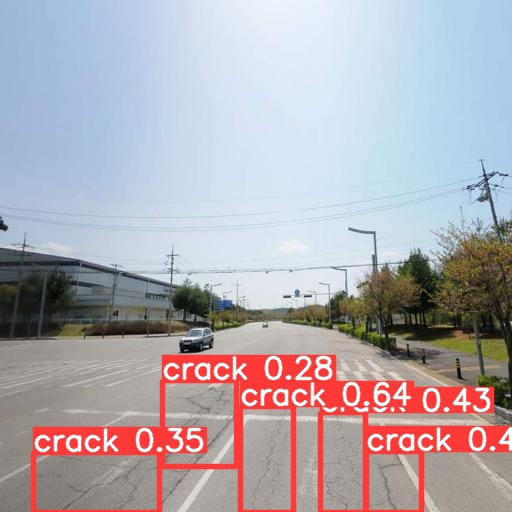

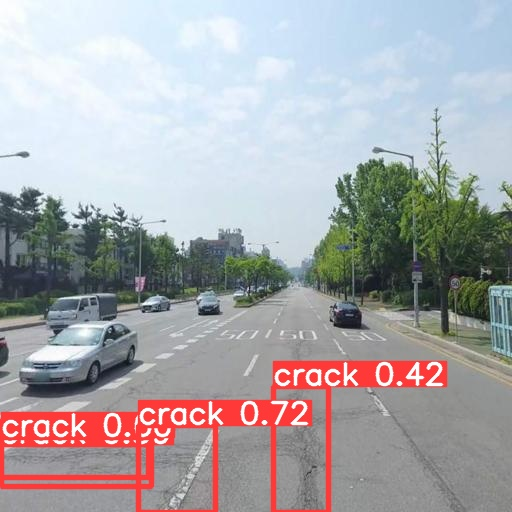

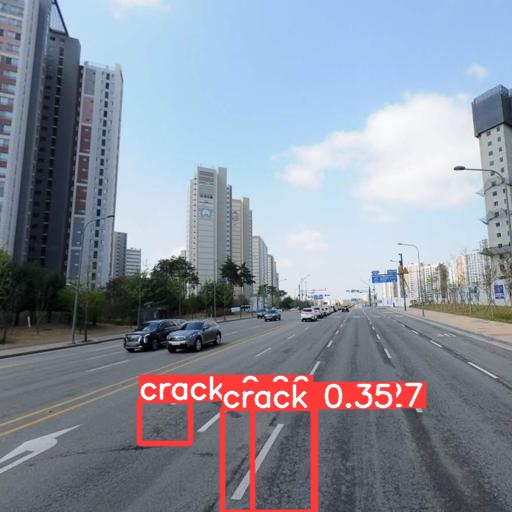

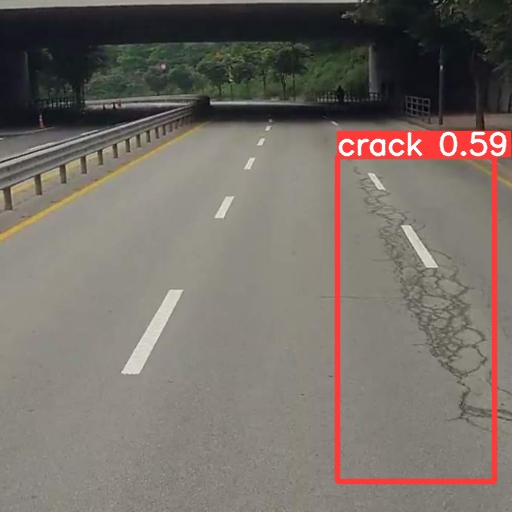

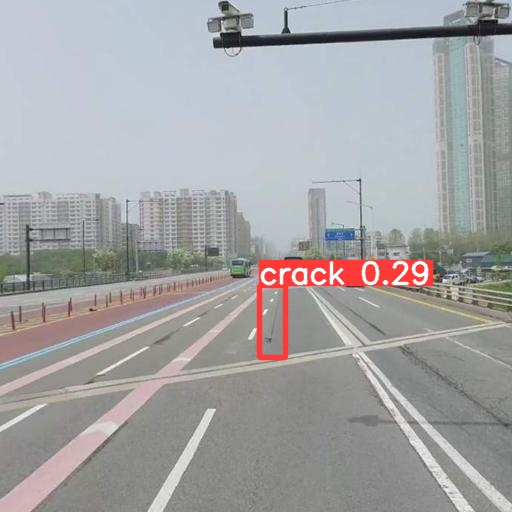

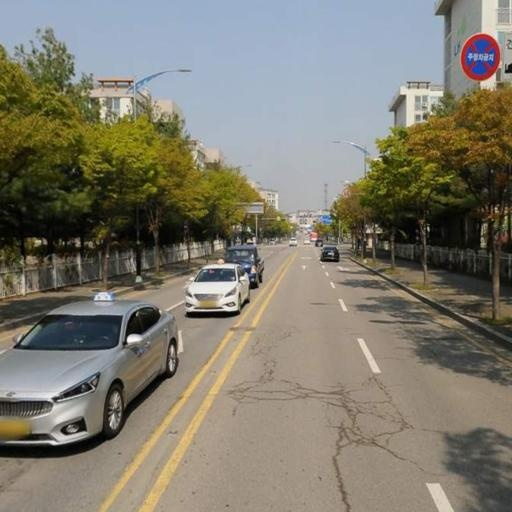

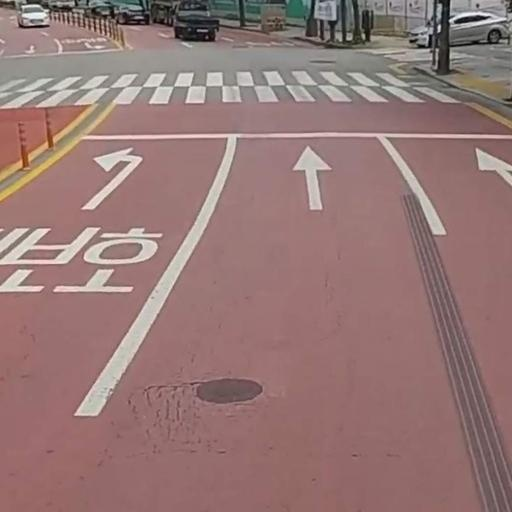

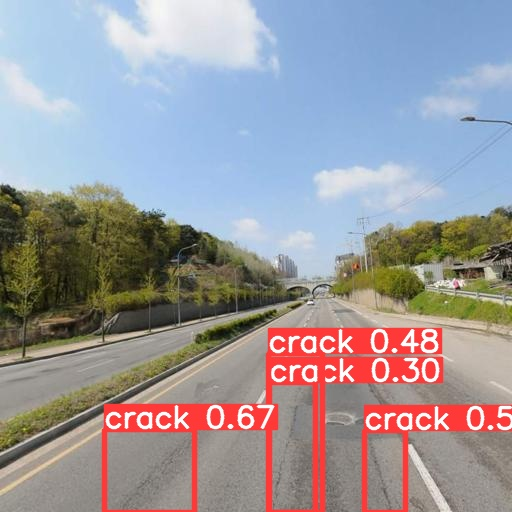

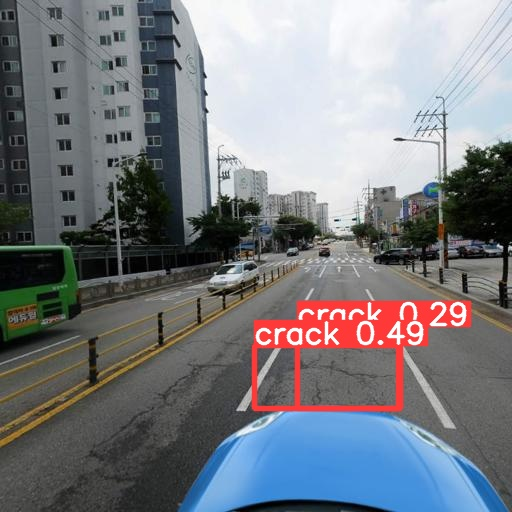

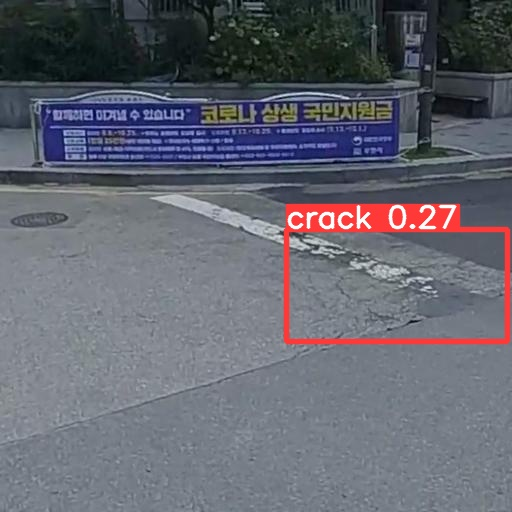

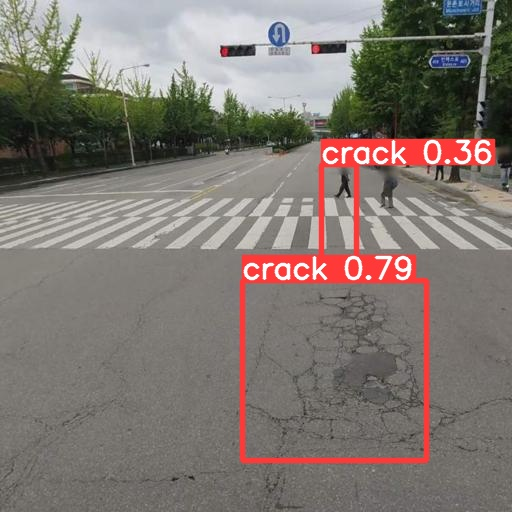

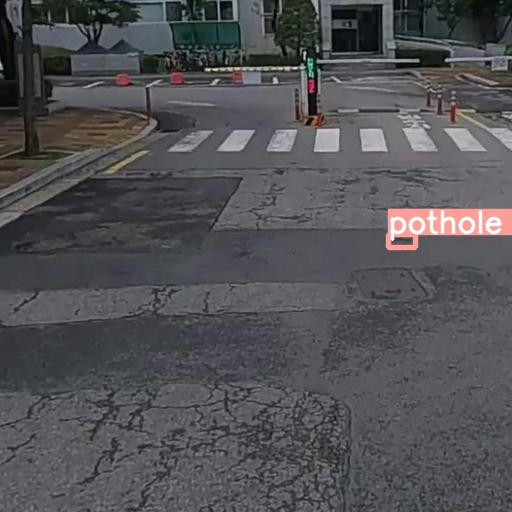

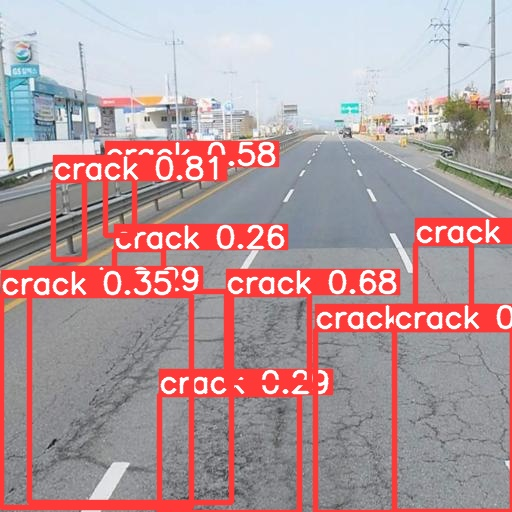

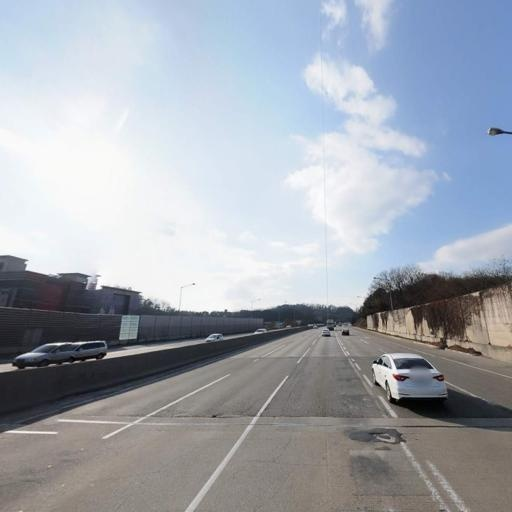

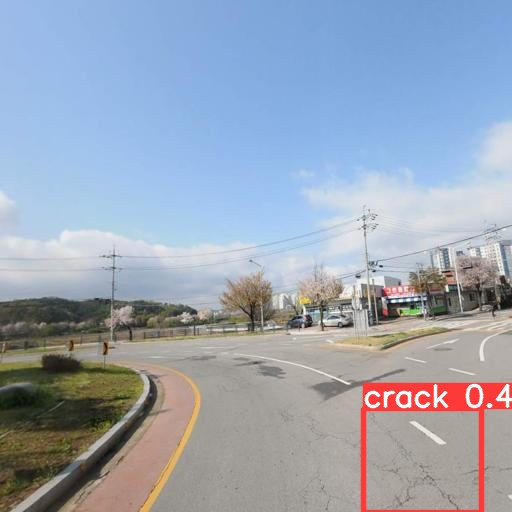

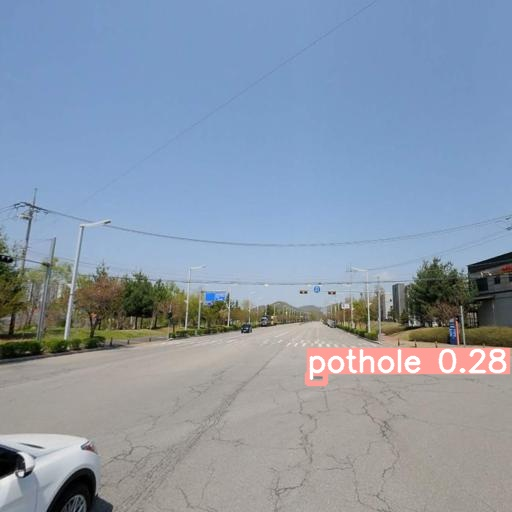

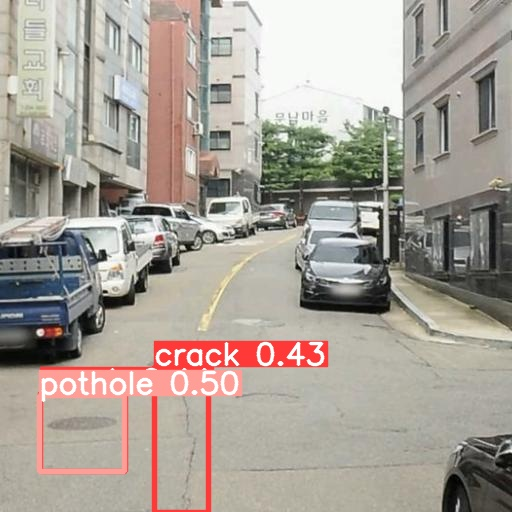

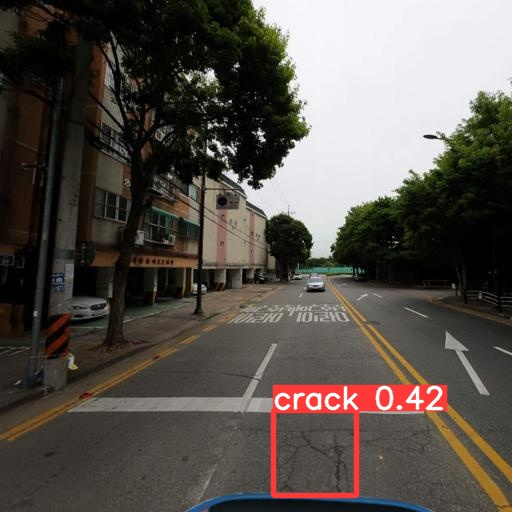

In [ ]:
i = 0
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*'):
      display(Image(filename=image_path, width=512))
      print("\n")
      i = i + 1
      if i == 20:
          break

#### (2) Prediction - real data

In [ ]:
# Move your test data to 'MyImgFolder'
!mkdir {HOME}/MyImgFolder

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/MyImgFolder' save=True

In [ ]:
i = 0
for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*'):
      display(Image(filename=image_path, width=512))
      print("\n")
      i = i + 1
      if i == 20:
          break